# Agglomeratives Hierarchisches Linkage Average Clustering

## Einführendes Beispiel
Wir erstellen ein Pandas Dataframe mit einigen Zahlen (Merkmale der Objekte).

In [8]:
import pandas as pd

df = pd.DataFrame({"Merkmal1": [20,9,8,22,9,19],
                   "Merkmal2": [48,34,30,50,31,48]},
                 index = ["Objekt1", "Objekt2","Objekt3", "Objekt4","Objekt5", "Objekt6"])

df

,Merkmal1,Merkmal2
Objekt1,20,48
Objekt2,9,34
Objekt3,8,30
Objekt4,22,50
Objekt5,9,31
Objekt6,19,48


Wichtig ist, die Daten zu standardisieren bzw. zu normalisieren. Hier normalisieren wir mit Hilfe der Methode *zscore*:

In [10]:
from scipy.stats import zscore
df_std = zscore(df)
df_std

array([[ 0.93077841,  0.90975316],
       [-0.93077841, -0.71618866],
       [-1.10001085, -1.18074346],
       [ 1.26924329,  1.14203056],
       [-0.93077841, -1.06460476],
       [ 0.76154597,  0.90975316]])

Nun clustern wir die Daten mit derr Funktion *linkage*

In [17]:
from scipy.cluster.hierarchy import linkage
df_dend = linkage(df_std, "average")
df_dend

array([[0.        , 5.        , 0.16923244, 2.        ],
       [2.        , 4.        , 0.20525062, 2.        ],
       [1.        , 7.        , 0.42141787, 3.        ],
       [3.        , 6.        , 0.4844053 , 3.        ],
       [8.        , 9.        , 2.79553817, 6.        ]])

Schließlich können wir die Hierarchie plotten.

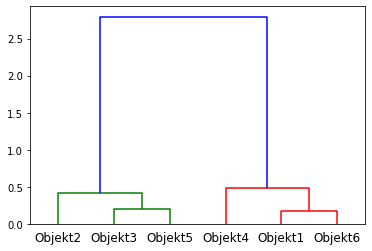

In [38]:
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram
__=dendrogram(df_dend, labels = df.index)

## Beispiel mit dem Datensatz cars

In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/troescherw/datasets/master/cars.csv"
cars = pd.read_csv(url, delimiter=";", usecols=[0,1,6], index_col=0)
cars.head()

,mpg,wt
Mazda RX4,21.0,2.620
Mazda RX4 Wag,21.0,2.875
Datsun 710,22.8,2.320
Hornet 4 Drive,21.4,3.215
Hornet Sportabout,18.7,3.440


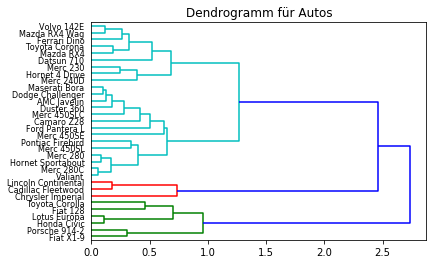

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, dendrogram
cars_std =zscore(cars)
cars_dend = linkage(cars_std, "average")


__ = dendrogram(cars_dend, labels=cars.index, orientation="right")
plt.title("Dendrogramm für Autos")
plt.show()


## Weiteres Beispiel mit Fahrzeugdaten
Um nochmals zu verdeutlichen, dass hier nicht-gelabelte Daten zusammengefasst (geclustert) werden, erstellen wir Beispieldaten mit Fahrzeugen. Der Algorithmus *weiß* aber nicht, ob es sich um Fahrräder, Autos oder sonstige Fahrzeuge handelt. Die Objekte werden anhand ihrer  Eigenschaften geclustert!

In [88]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import zscore
from sklearn import preprocessing
import numpy as np

url = "https://raw.githubusercontent.com/troescherw/datasets/master/Fahrzeuge.csv"
fahrzeuge = pd.read_csv(url, delimiter=";", index_col=5)
fahrzeuge

,FahrzeugNr,AnzahlRaeder,Leistung,Kraftstoff,Gewicht
Bezeichnung,,,,,
Fahrrad1,1,2,0.00,Muskel,5.50
Auto1,2,4,130.00,Benzin,1200.00
LKW1,3,4,250.00,Diesel,6000.00
EBike1,4,2,0.35,Strom,7.50
Auto2,5,4,140.00,Benzin,1220.00
Auto3,6,4,120.00,Benzin,1215.00
Fahrrad3,7,2,0.00,Muskel,6.15
LKW2,8,4,320.00,Diesel,7100.00
Auto4,9,4,128.00,Benzin,1150.00


In [89]:
df = fahrzeuge.iloc[1:, :4]
df.head()

,FahrzeugNr,AnzahlRaeder,Leistung,Kraftstoff
Bezeichnung,,,,
Auto1,2,4,130.00,Benzin
LKW1,3,4,250.00,Diesel
EBike1,4,2,0.35,Strom
Auto2,5,4,140.00,Benzin
Auto3,6,4,120.00,Benzin


In [94]:
df = pd.get_dummies(df)

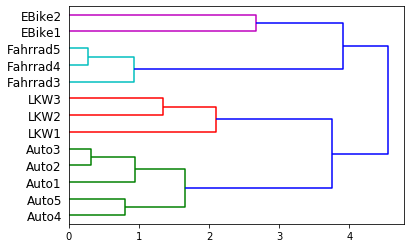

In [95]:
df= zscore(df)
df_dend = linkage(df, "average")
__=dendrogram(df_dend, labels=fahrzeuge.index, orientation="right")

-------
## Dendrogramm mit dem IRIS-Datensatz
Erstellen wir noch ein Dendrogramm mit dem IRIS-Datensatz:

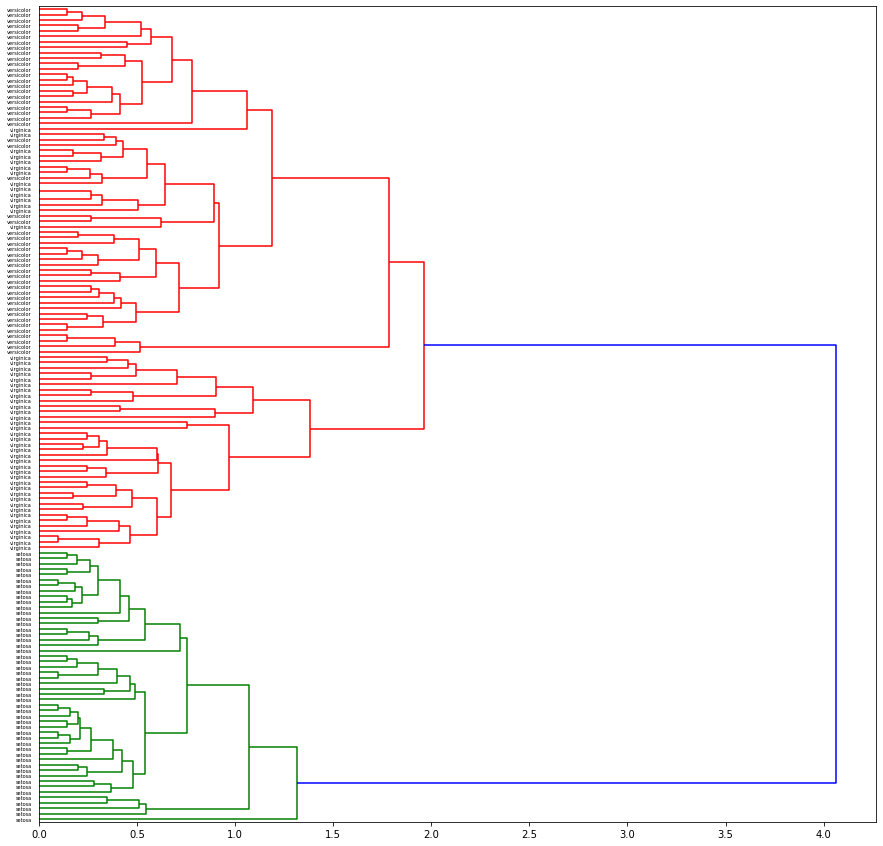

In [131]:
%matplotlib inline
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.stats import zscore
from sklearn import preprocessing
import numpy as np

url = "https://raw.githubusercontent.com/troescherw/datasets/master/iris.csv"
df = pd.read_csv(url, delimiter=";", index_col=4, usecols=[0,1,2,3,4])
iris_dend = linkage(df, "average")

plt.rcParams['figure.figsize'] = [15, 15]
__=dendrogram(iris_dend, labels=df.index, orientation="right")

plt.show()

Auch hier stellen wir wieder fest, dass sich die Species Setosa deutlich von den anderen beiden Spezies unterscheidet!